In [1]:
import os
import pandas as pd
import numpy as np

path = os.getcwd()
survey_path = "{0}/survey_gamification".format(os.getcwd())
results = f'{os.getcwd()}/results_30'
fee_path = f'{results}/FEATURE_ENGINEERING'
ete_path = f'{results}/END_TO_END'

In [2]:
from src.signals.eda import EDAExperiment
from src.signals.eeg import EEGExperiment
from src.signals.ppg import PPGExperiment

from src.experiments.consts import ExperimentType

sms = PPGExperiment(path=path, device="samsung", classifier='cnn', type=ExperimentType.END_TO_END)
emp = PPGExperiment(path=path, device="empatica", classifier='cnn', type=ExperimentType.END_TO_END)
eda = EDAExperiment(path=path, classifier='cnn', type=ExperimentType.END_TO_END)
eeg = EEGExperiment(path=path, classifier='cnn', type=ExperimentType.END_TO_END)

2024-11-02 13:19:45.308840: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-11-02 13:19:45.309339: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-11-02 13:19:45.311459: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-11-02 13:19:45.317726: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-11-02 13:19:45.327889: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been 

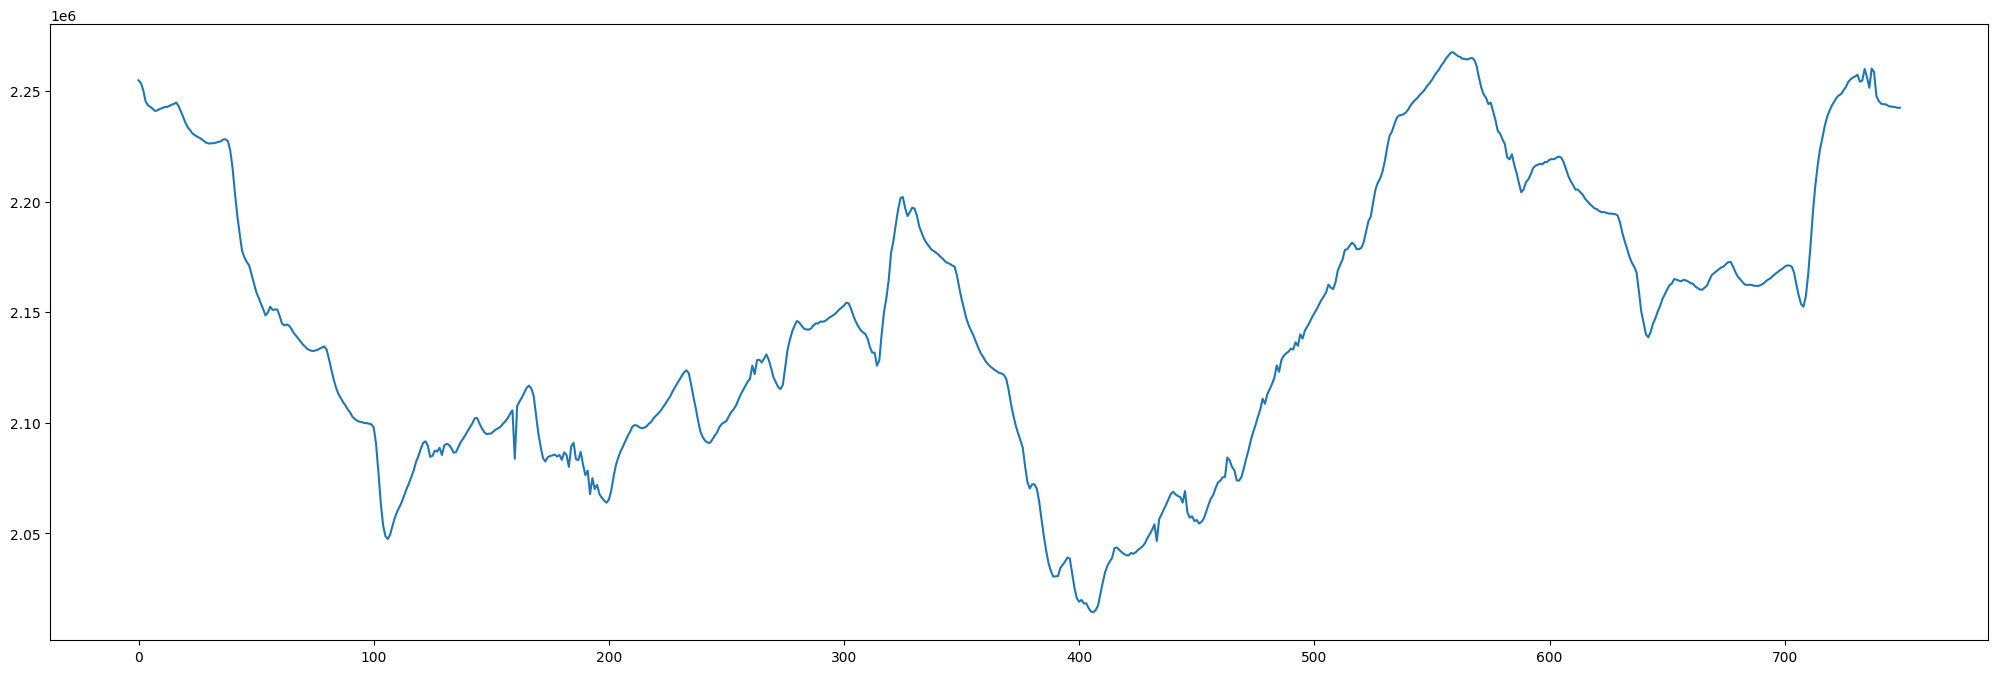

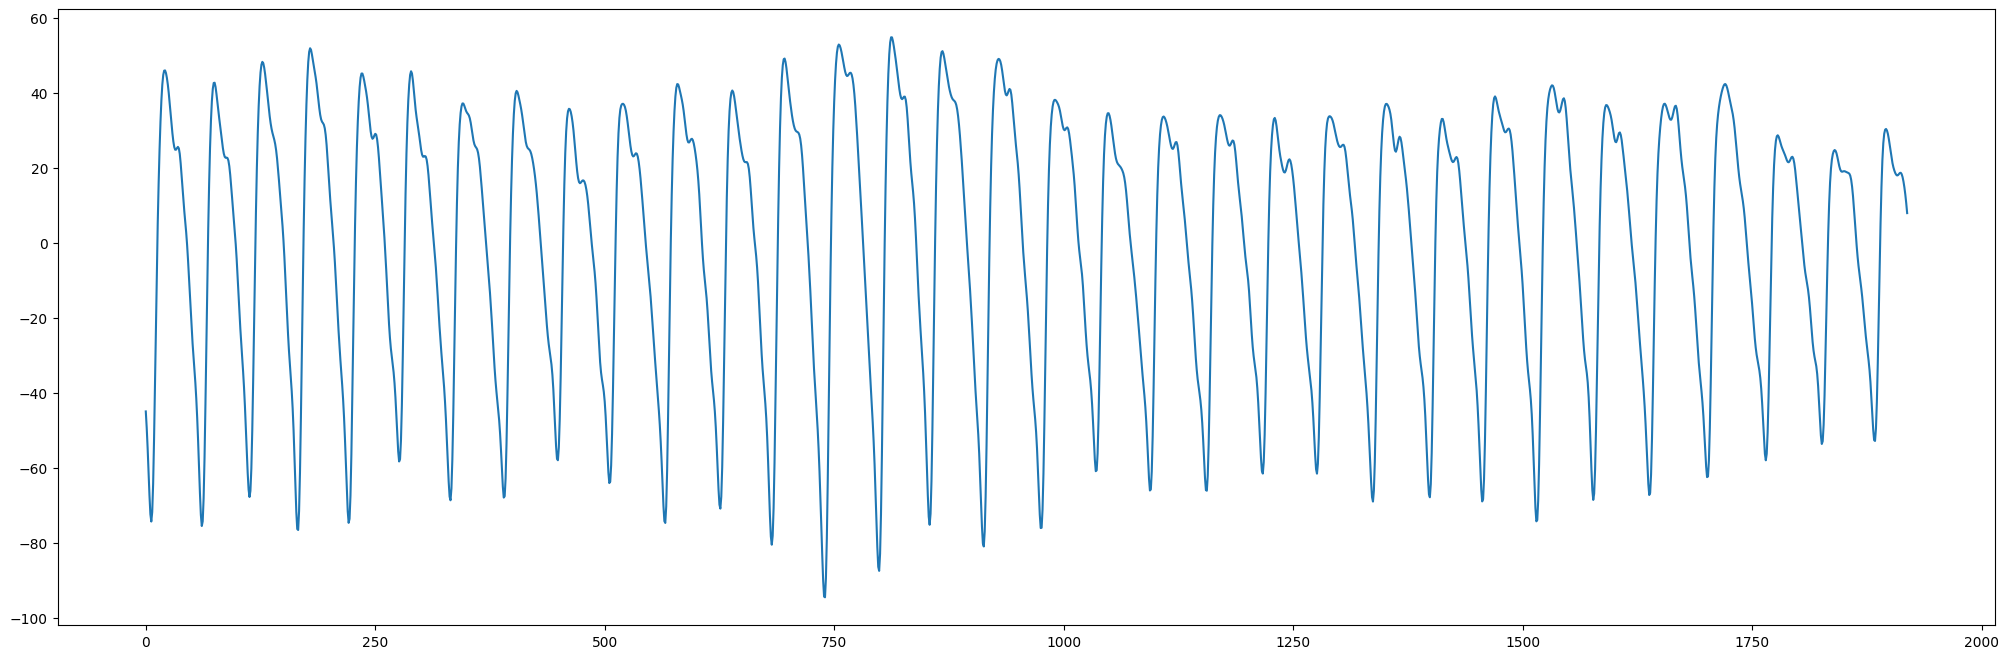

right values


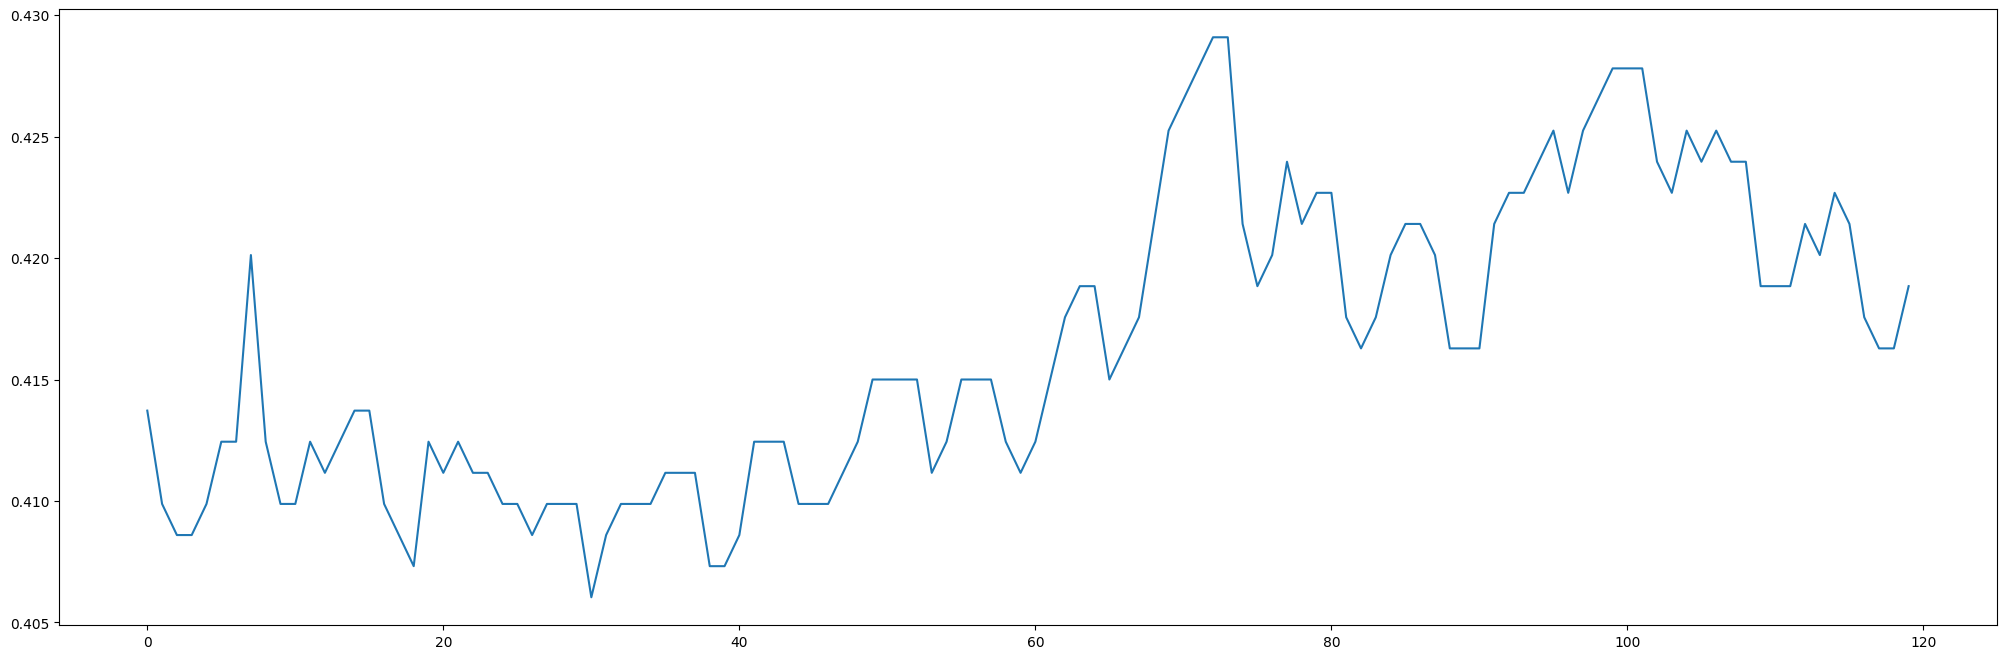

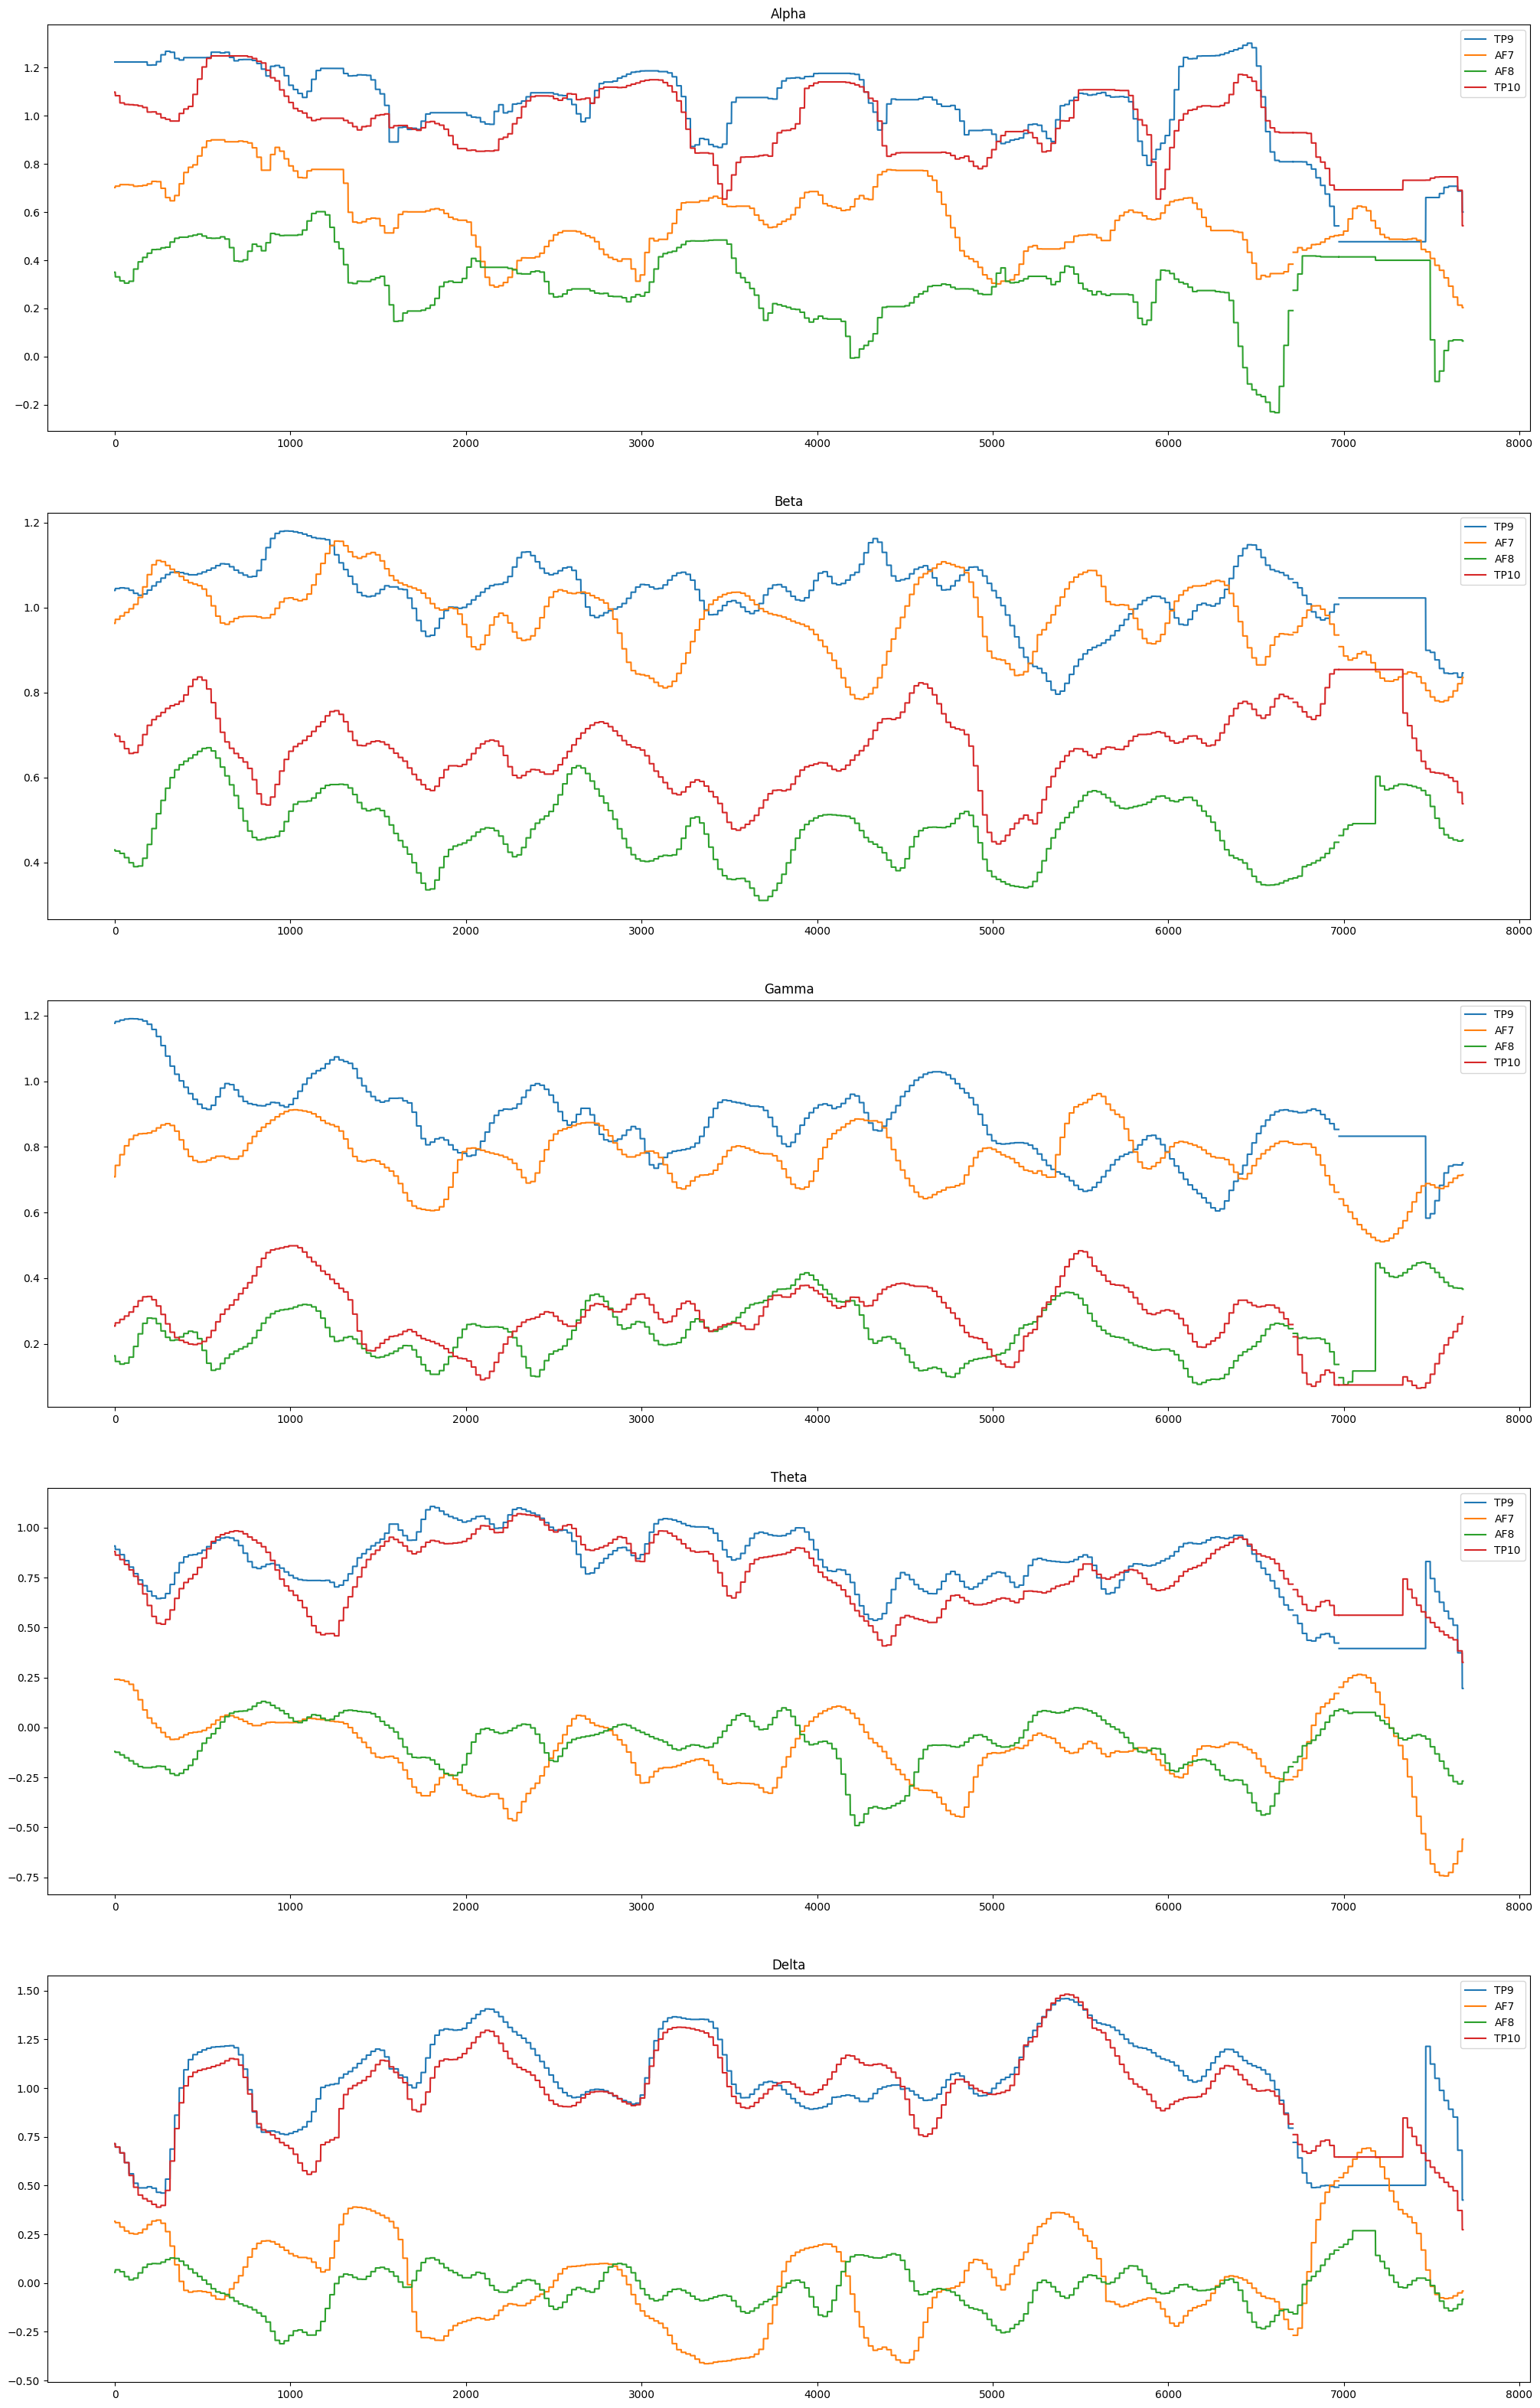

In [3]:
sms.subjects[0].show(window=8)
emp.subjects[0].show(window=8)
eda.subjects[0].show(window=8)
eeg.subjects[0].show(window=8)

In [ ]:
from src.classifiers.tuning.index import Tuner

from src.classifiers.knn import Knn
from src.classifiers.xgb import Xgb
from src.classifiers.svm import Svm

from src.signals.eda import EDAExperiment
from src.signals.eeg import EEGExperiment
from src.signals.ppg import PPGExperiment

from src.experiments.consts import ExperimentType


clfs = [('knn', Knn()), ('svm', Svm()), ('xgb', Xgb())]
for (name, clf) in clfs:
  sms = PPGExperiment(path=path, device="samsung", classifier=name, type=ExperimentType.FEATURE_ENGINEERING)
  emp = PPGExperiment(path=path, device="empatica", classifier=name, type=ExperimentType.FEATURE_ENGINEERING)
  eda = EDAExperiment(path=path, classifier=name, type=ExperimentType.FEATURE_ENGINEERING)
  eeg = EEGExperiment(path=path, classifier=name, type=ExperimentType.FEATURE_ENGINEERING)

  t_sms = Tuner(sms)
  t_sms.tune(evals=100, max_evals=100)
  clf.cv_train(experiment=sms, hyperparameters=t_sms.best_hyperparameters())
  clf.predict(sms)

  t_emp = Tuner(emp)
  t_emp.tune(evals=100, max_evals=100)
  clf.cv_train(experiment=emp, hyperparameters=t_emp.best_hyperparameters())
  clf.predict(emp)

  t_eda = Tuner(eda)
  t_eda.tune(evals=100, max_evals=100)
  clf.cv_train(experiment=eda, hyperparameters=t_eda.best_hyperparameters())
  clf.predict(eda)

  t_eeg = Tuner(eeg)
  t_eeg.tune(evals=100, max_evals=100)
  clf.cv_train(experiment=eeg, hyperparameters=t_eeg.best_hyperparameters())
  clf.predict(eeg)

In [ ]:
clfs = ['cnn', 'fcn', 'resnet', 'lstm']
for (name, clf) in clfs:
  sms = PPGExperiment(path=path, device="samsung", classifier=name, type=ExperimentType.END_TO_END)
  emp = PPGExperiment(path=path, device="empatica", classifier=name, type=ExperimentType.END_TO_END)
  eda = EDAExperiment(path=path, classifier=name, type=ExperimentType.END_TO_END)
  eeg = EEGExperiment(path=path, classifier=name, type=ExperimentType.END_TO_END)

  t_sms = Tuner(sms)
  t_sms.tune(evals=40, max_evals=40)
  sms.losocv_run(t_sms)
  sms.test_best_models(t_sms)

  t_emp = Tuner(emp)
  t_emp.tune(evals=40, max_evals=40)
  emp.losocv_run(t_emp)
  emp.test_best_models(t_emp)

  t_eda = Tuner(eda)
  t_eda.tune(evals=40, max_evals=40)
  eda.losocv_run(t_eda)
  eda.test_best_models(t_eda)

  t_eeg = Tuner(eeg)
  t_eeg.tune(evals=40, max_evals=40)
  eeg.losocv_run(t_eeg)
  eeg.test_best_models(t_eeg)

In [ ]:
from src.data_prepare import prepare_data

prepare_data('/home/mateus/Documents/school/tcc/survey_gamification')

In [ ]:
def ft(seconds):
  return f"{seconds // 60}\'{seconds % 60}\""

stat = pd.DataFrame(columns=["volunteer", "sms_na", "sms_total", "sms_recording", "emp_na", "emp_total", "emp_recording", "eda_na", "eda_total", "eda_recording", "eeg_na", "eeg_total", "eeg_recording"])
vols = os.listdir(survey_path)
vols.sort()
for v in vols:
  metrics = {"volunteer": v,
             'sms_min': 0, 'sms_max': 0, 'sms_mean': 0, 'sms_std': 0,
             'emp_min': 0, 'emp_max': 0, 'emp_mean': 0, 'emp_std': 0,
             'eda_min': 0, 'eda_max': 0, 'eda_mean': 0, 'eds_std': 0,
             'eeg_min': 0, 'eeg_max': 0, 'eeg_mean': 0, 'eeg_std': 0,
             'sms_ratio': 0,'emp_ratio': 0,'eda_ratio': 0,'eeg_ratio': 0, 'sms_t': '', 'emp_t': '', 'eda_t': '', 'eeg_t': '', "sms_na": 0, "sms_total": 0, "sms_recording": 0, "emp_na": 0, "emp_total": 0, "emp_recording": 0, "eda_na": 0, "eda_total": 0, "eda_recording": 0, "eeg_na": 0, "eeg_total": 0, "eeg_recording": 0}
  samsung = pd.read_csv(os.path.join(survey_path, v, "samsung_ppg.csv"))
  emp = pd.read_csv(os.path.join(survey_path, v, "empatica_ppg.csv"))
  eda = pd.read_csv(os.path.join(survey_path, v, "empatica_eda.csv"))
  eeg = pd.read_csv(os.path.join(survey_path, v, "muse_eeg.csv"))
  # print(f"Volunteer {v}")

  total = samsung.shape[0]
  metrics["sms_total"] = total
  na = samsung.isnull().any(axis=1).sum()
  metrics["sms_na"] = na
  seconds = total // 25
  metrics["sms_recording"] = seconds
  metrics["sms_t"] = ft(seconds)
  cl_s = len(samsung.where(samsung['y'] == 1).dropna())
  bl_s = len(samsung.where(samsung['y'] == 0).dropna())
  metrics['sms_min'] = round(samsung['ppg'].min(), 3).__str__()
  metrics['sms_max'] = round(samsung['ppg'].max(), 2).__str__()
  metrics['sms_mean'] = round(samsung['ppg'].mean(), 3).__str__()
  metrics['sms_std'] = round(samsung['ppg'].std(), 3).__str__()
  s_ratio = round(cl_s / bl_s, 3)
  metrics['sms_ratio'] = s_ratio
  # print(f"  PPG| na: {na} | total: {total} | ratio: {s_ratio} | {seconds // 60}\' {seconds % 60}\"")

  total = emp.shape[0]
  metrics["emp_total"] = total
  na = emp.isnull().any(axis=1).sum()
  metrics["emp_na"] = na
  cl = len(emp.where(emp['y'] == 1).dropna())
  bl = len(emp.where(emp['y'] == 0).dropna())
  seconds = total // 64
  metrics["emp_t"] = ft(seconds)
  metrics["emp_recording"] = seconds
  emp_ratio = round(cl / bl, 3)
  metrics['emp_ratio'] = emp_ratio
  metrics['emp_min'] = round(emp['ppg'].min(), 3).__str__()
  metrics['emp_max'] = round(emp['ppg'].max(), 3).__str__()
  metrics['emp_mean'] = round(emp['ppg'].mean(), 3).__str__()
  metrics['emp_std'] = round(emp['ppg'].std(), 3).__str__()
  # print(f"  EMP| na: {na} | total: {total} | ratio: {emp_ratio} | {seconds // 60}\' {seconds % 60}\"")

  total = eda.shape[0]
  metrics["eda_total"] = total
  na = eda.isnull().any(axis=1).sum()
  cl = len(eda.where(eda['y'] == 1).dropna())
  bl = len(eda.where(eda['y'] == 0).dropna())
  metrics["eda_na"] = na
  seconds = total // 4
  metrics["eda_t"] = ft(seconds)
  metrics["eda_recording"] = seconds
  eda_ratio = round(cl / bl, 3)
  metrics['eda_ratio'] = eda_ratio
  metrics['eda_min'] = round(eda['eda'].min(), 3).__str__()
  metrics['eda_max'] = round(eda['eda'].max(), 3).__str__()
  metrics['eda_mean'] = round(eda['eda'].mean(), 3).__str__()
  metrics['eda_std'] = round(eda['eda'].std(), 3).__str__()
  # print(f"  EDA| na: {na} | total: {total} | ratio: {eda_ratio} | {seconds // 60}\' {seconds % 60}\"")

  total = eeg.shape[0]
  metrics["eeg_total"] = total
  na = eeg.isnull().any(axis=1).sum()
  metrics["eeg_na"] = na
  cl = len(eeg.where(eeg['y'] == 1).dropna())
  bl = len(eeg.where(eeg['y'] == 0).dropna())
  seconds = total // 256
  metrics["eeg_t"] = ft(seconds)
  metrics["eeg_recording"] = seconds
  eeg_ratio = round(cl / (bl | 1), 3)
  metrics['eeg_ratio'] = eeg_ratio
  # print(f"  EEG| na: {na} | total: {total} | ratio: {eeg_ratio} | {seconds // 60}\' {seconds % 60}\"")

  latex = '''\
    \\midrule
\\parbox[t]{{2mm}}{{\\multirow{{4}}{{*}}{{\\rotatebox[origin=c]{{90}}{{\\textbf {{Vol. {volunteer}}}}}}}}} &
      Samsung PPG  & {sms_t}    & {sms_ratio}    & {sms_total}  & {sms_na} & {sms_min} & {sms_max} & {sms_mean} & {sms_std}  \\\\
      & Empatica PPG  & {emp_t}    & {emp_ratio}    & {emp_total}  & {emp_na} & {emp_min} & {emp_max} & {emp_mean} & {emp_std} \\\\
      & Empatica EDA  & {eda_t}    & {eda_ratio}    & {eda_total}  & {eda_na}& {eda_min} & {eda_max} & {eda_mean} & {eda_std}  \\\\
      & Muse EEG  & {eeg_t}    & {eeg_ratio}    & {eeg_total}  & {eeg_na} & N/A & N/A & N/A & N/A \\\\
  '''.format(**metrics)
  print(latex)

  # row = pd.DataFrame(data=metrics, index=[0])
  # stat = pd.concat([stat, row], ignore_index=True)


In [ ]:
for row in stat.iterrows():
  print((row[1]["eeg_na"] / row[1]["eeg_total"]) * 100)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score, roc_auc_score
from src.experiments.consts import ExperimentType
import warnings

class Setup():
  def __init__(self, type: ExperimentType):
    self.type = type
    self.classifiers = ["cnn", "fcn", "lstm", "resnet"] if ExperimentType.END_TO_END == type else ['knn', 'svm', 'xgb']
    results = f'{os.getcwd()}/results_30'
    fee_path = f'{results}/FEATURE_ENGINEERING'
    ete_path = f'{results}/END_TO_END'
    self.path = fee_path if ExperimentType.FEATURE_ENGINEERING == type else ete_path
    self.subject_ids = ['11', '12', '13', '14', '15', '16', '17', '18', '20', '21']
  
  def metrics(self, result={}, all_reports={}):
    for device_signal in os.listdir(self.path):
      if not device_signal in result:
        result[device_signal] = {}
        all_reports[device_signal] = {}
      for classifier in self.classifiers:
        if not classifier in result[device_signal]:
          result[device_signal][classifier] = {}
          all_reports[device_signal][classifier] = []
        for id in self.subject_ids:
          report = self.report(device_signal=device_signal, classifier=classifier, subject=id)
          all_reports[device_signal][classifier].append(report)
          if not 'f1' in result[device_signal][classifier] or report['f1'] > result[device_signal][classifier]["f1"]:
            result[device_signal][classifier] = report
            result[device_signal][classifier]['id'] = id
    return result, all_reports

  def report(self, device_signal, classifier, subject):
    rounds = [0, 1, 2]
    accuracy= []
    precision= []
    recall= []
    f1= []
    roc_auc= []
    duration = []
    for round in rounds:
      root = f'{self.path}/{device_signal}/test/{classifier}/{subject}-{round}'
      pred = f'{root}predictions.txt'
      metr = f'{root}_df_metrics.csv'
      df = pd.read_csv(metr)
      duration.append(float(df['duration'].iloc[0]))
      with open(pred, "rb") as f:
        true = [int(a) for a in f.readline().decode().replace("[", "").replace("]", "").split(" ")[:-1]]
        pred = [int(float(a)) for a in f.readline().decode().replace("[", "").replace("]", "").split(" ")[:-1]]
        
        accuracy.append(accuracy_score(true, pred))
        precision.append(precision_score(true, pred))
        f1.append(f1_score(true, pred))
        recall.append(recall_score(true, pred))
        roc_auc.append(roc_auc_score(true, pred))

    return {'accuracy': np.mean(accuracy), 'median_accuracy': np.median(accuracy), 'precision': np.mean(precision), 'recall': np.mean(recall), 'f1': np.mean(f1), 'roc_auc': np.mean(roc_auc), 'duration': np.mean(duration)}


In [ ]:
def latex_all_start(metrics):
  for device_signal in metrics:
    [device, signal] = device_signal.split('_')
    print(f'\\midrule')
    print(f'\\parbox[t]{{2mm}}{{\\multirow{{7}}{{*}}{{\\rotatebox[origin=c]{{90}}{{\\textbf {{{device.capitalize()} {signal.upper()}}}}}}}}} ')
    for classifier in metrics[device_signal]:
      m = metrics[device_signal][classifier]
      print(f'  & {classifier.upper()} & {round(m["accuracy"], 3)} & {round(m["precision"], 3)} & {round(m["recall"], 3)} & {round(m["f1"], 3)} & {round(m["roc_auc"], 3)} \\\\ ')

In [ ]:
warnings.filterwarnings('ignore') 
data, all_reports = Setup(type=ExperimentType.END_TO_END).metrics()
Setup(type=ExperimentType.FEATURE_ENGINEERING).metrics(result=data, all_reports=all_reports)
data

In [ ]:
all_reports['samsung_ppg']['svm']

In [ ]:
latex_all_start(data)

In [ ]:
from src.classifiers.xgb import Xgb
model = Xgb().load_model(filename=f'{fee_path}/samsung_ppg/losocv/xgb/xgb_21.pkl')
model.get_booster().get_score(importance_type='gain')

In [ ]:
Setup(type=ExperimentType.FEATURE_ENGINEERING).metrics(result=data)

In [ ]:
best_values = {}
for device_signal in data:
  bf1 = 0
  best = ''
  for classifier in data[device_signal]:
    if bf1 < data[device_signal][classifier]['accuracy']:
      bf1 = data[device_signal][classifier]['accuracy']
      best = classifier
  print(f'{device_signal} |>')
  best_values[device_signal] = data[device_signal][best]
  print(f'  {best} at id {data[device_signal][best]["id"]}')
  print(f'  {data[device_signal][best]}')

In [ ]:
latex = '''\
  \\midrule
\\parbox[t]{{2mm}}{{\\multirow{{4}}{{*}}{{\\rotatebox[origin=c]{{90}}{{\\textbf {{Vol. {volunteer}}}}}}}}} &
    Samsung PPG  & {sms_t}    & {sms_ratio}    & {sms_total}  & {sms_na} & {sms_min} & {sms_max} & {sms_mean} & {sms_std}  \\\\
    & Empatica PPG  & {emp_t}    & {emp_ratio}    & {emp_total}  & {emp_na} & {emp_min} & {emp_max} & {emp_mean} & {emp_std} \\\\
    & Empatica EDA  & {eda_t}    & {eda_ratio}    & {eda_total}  & {eda_na}& {eda_min} & {eda_max} & {eda_mean} & {eda_std}  \\\\
    & Muse EEG  & {eeg_t}    & {eeg_ratio}    & {eeg_total}  & {eeg_na} & N/A & N/A & N/A & N/A \\\\
'''.format(**metrics)